In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [73]:
data = pd.read_csv('car details v4.csv')

In [74]:
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [75]:
data.drop(columns=['Color', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity'],inplace=True)

In [76]:
data['Car model'] = data['Make'] + data['Model']

In [77]:
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Owner,Seller Type,Car model
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,First,Corporate,HondaAmaze 1.2 VX i-VTEC
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,Second,Individual,Maruti SuzukiSwift DZire VDI
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,First,Individual,Hyundaii10 Magna 1.2 Kappa2
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,First,Individual,ToyotaGlanza G
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,First,Individual,ToyotaInnova 2.4 VX 7 STR [2016-2020]


In [78]:
data = data[['Price','Year','Kilometer','Transmission','Location','Owner','Seller Type','Car model','Fuel Type']]

In [79]:
data.head()

,Price,Year,Kilometer,Transmission,Location,Owner,Seller Type,Car model,Fuel Type
0,505000,2017,87150,Manual,Pune,First,Corporate,HondaAmaze 1.2 VX i-VTEC,Petrol
1,450000,2014,75000,Manual,Ludhiana,Second,Individual,Maruti SuzukiSwift DZire VDI,Diesel
2,220000,2011,67000,Manual,Lucknow,First,Individual,Hyundaii10 Magna 1.2 Kappa2,Petrol
3,799000,2019,37500,Manual,Mangalore,First,Individual,ToyotaGlanza G,Petrol
4,1950000,2018,69000,Manual,Mumbai,First,Individual,ToyotaInnova 2.4 VX 7 STR [2016-2020],Diesel


In [66]:
data.isnull().sum()

Price           0
Year            0
Kilometer       0
Transmission    0
Location        0
Owner           0
Seller Type     0
Car model       0
Fuel Type       0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data['Location'].value_counts()

Location
Mumbai              342
Delhi               307
Pune                144
Bangalore           132
Hyderabad           116
                   ... 
Faizabad              1
Pimpri-Chinchwad      1
Rohtak                1
Valsad                1
Siliguri              1
Name: count, Length: 77, dtype: int64

C:\Users\Shubham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


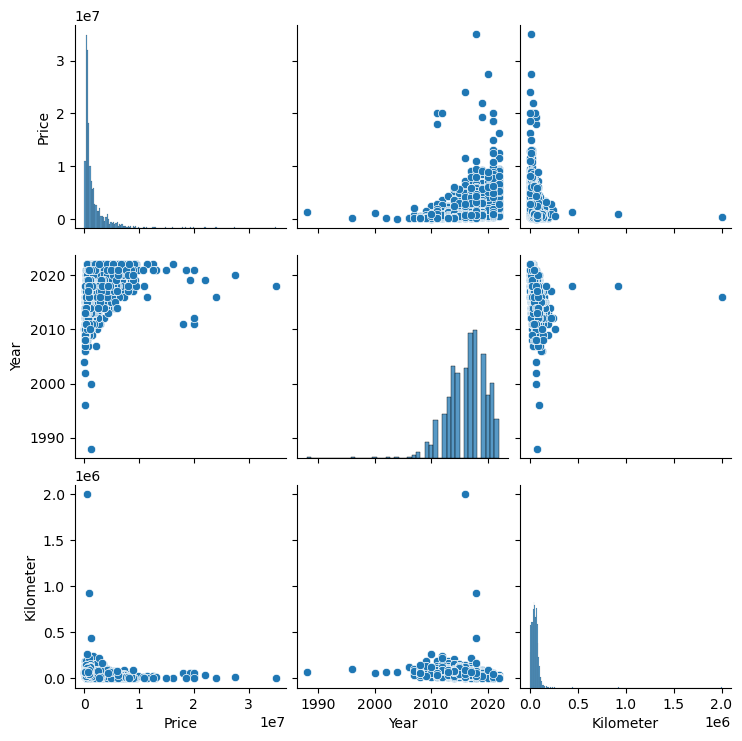

In [13]:
sns.pairplot(data)
plt.show()

## Compairing the Selling price with the car model

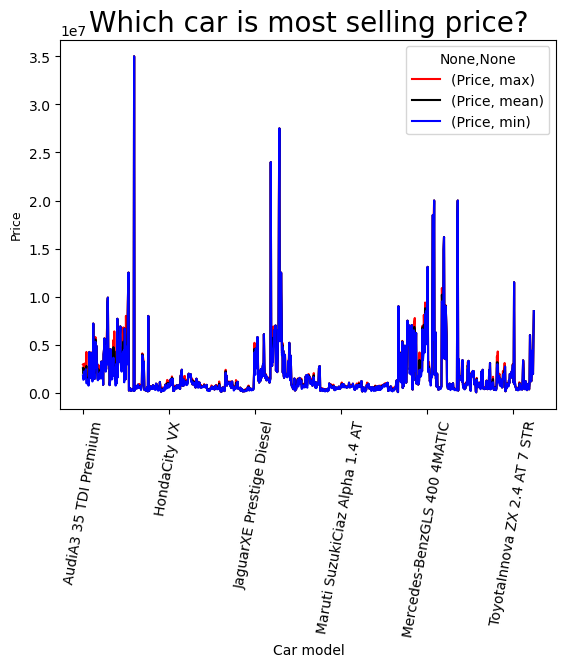

History's Best Selling Vehicles


,Car model,Price
910,AudiA3 35 TDI Premium,2950000
605,AudiA3 35 TDI Premium + Sunroof,2900000
711,AudiA3 35 TDI Premium Plus,2590000
1734,AudiA3 35 TDI Premium Plus + Sunroof,2950000
119,AudiA3 35 TDI Technology + Sunroof,3050000
1034,AudiA3 35 TFSI Premium Plus,2180000
1361,AudiA3 40 TFSI Premium,1760000
721,AudiA3 40 TFSI Premium Plus + sunroof,2450000
693,AudiA4 1.8 TFSI Multitronic Premium Plus,4250000
69,AudiA4 2.0 TDI (143 bhp),1250000


In [14]:
# here we are comparing the selling_price with name and model of the vehicle
# first group the name and get max,min and avg selling price of the vehicle
display(data[["Car model","Price",]].groupby(["Car model"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="Blues"))
# here we are ploting these values using lineplot
data[["Car model","Price",]].groupby(["Car model"]).agg(["max",'mean',"min"]).plot(kind="line",color =["red","black","blue"])
plt.title("Which car is most selling price?", fontsize=20)
plt.ylabel("Price",fontsize=9) 
plt.xticks(rotation=80)
#plt.xlabel(" ")
plt.show()
print("History's Best Selling Vehicles")
display(data.loc[data.groupby(data["Car model"])["Price"].idxmax()][["Car model",
                                                                  "Price"]].style.background_gradient(cmap="copper")) 

Text(0.5, 1.0, 'Frequency of Locations')

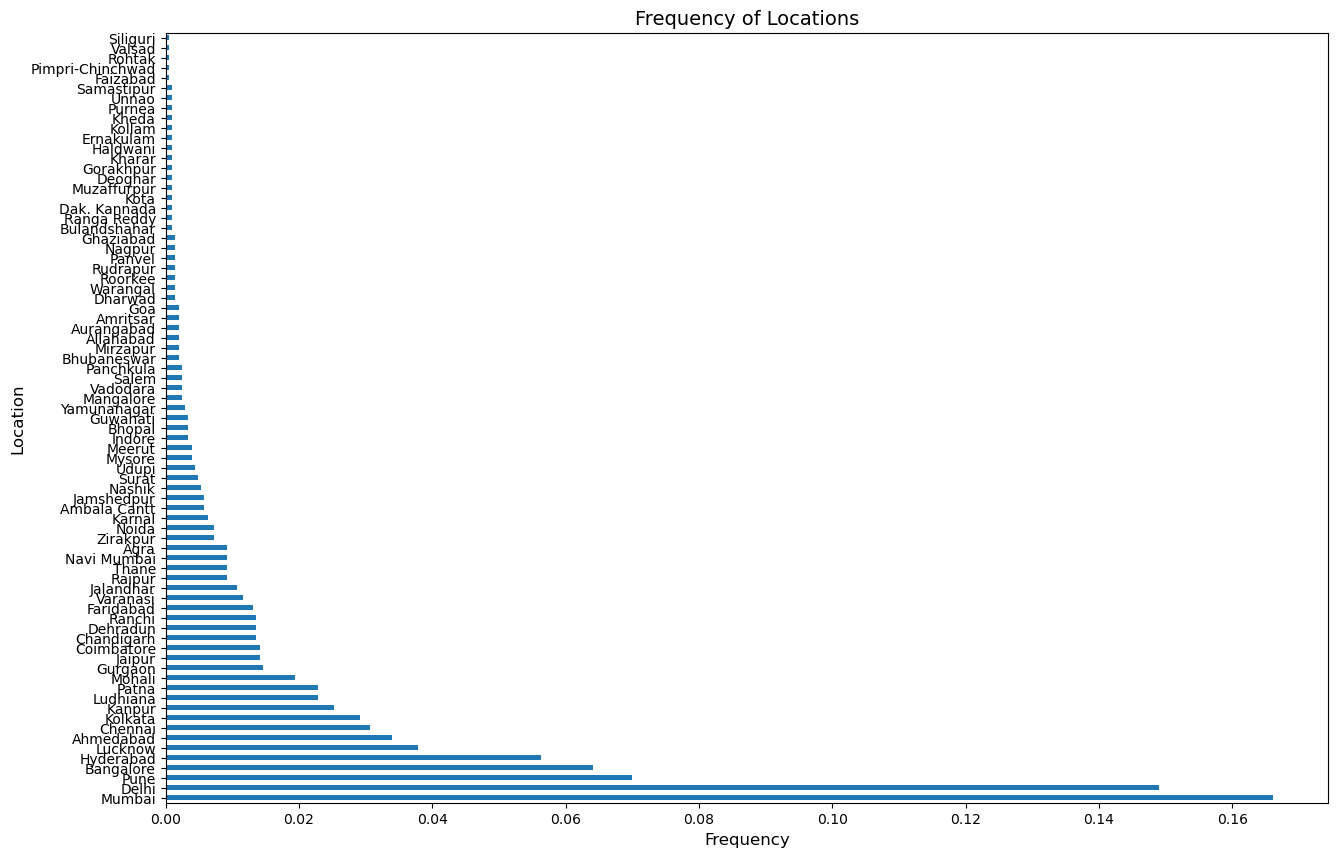

In [15]:
plt.figure(figsize=(15, 10))
data['Location'].value_counts(normalize=True).plot(kind='barh')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.title('Frequency of Locations', fontsize=14)

This Bar graph shows the diversity of the data geographically. We can see that we have the maximum number of data of cities Mumbai and Delhi and minimum number of data for Siliguri and Valsad.

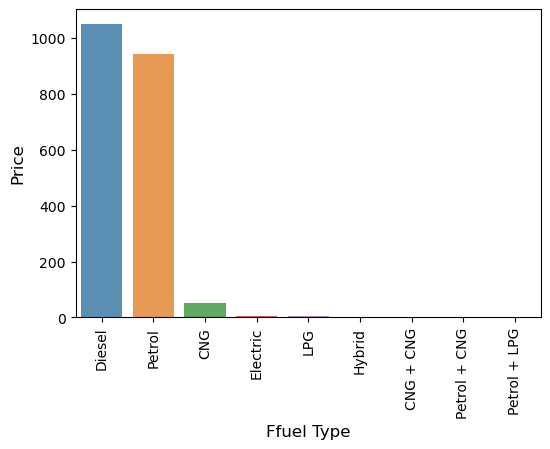

In [16]:
cnt_pro = data['Fuel Type'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Ffuel Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

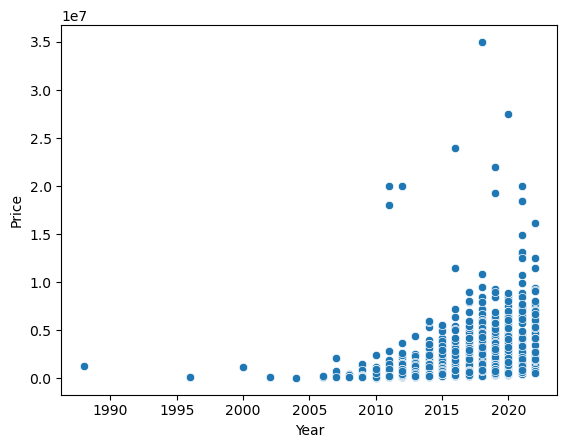

In [18]:
sns.scatterplot(x=data['Year'], y=data['Price'])
plt.show()

This graph shows that the selling price is increasing with respect to the year.

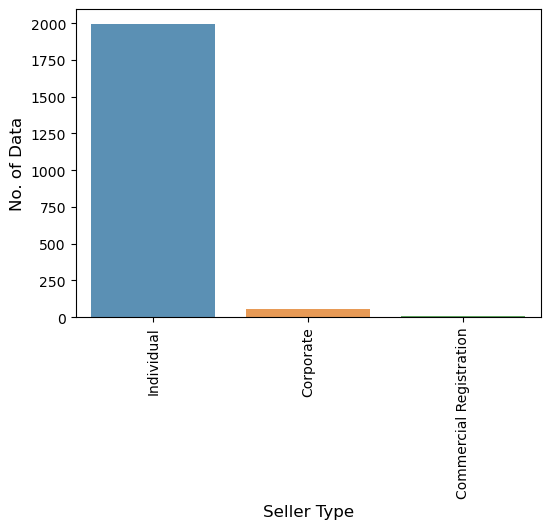

In [19]:
cnt_pro = data['Seller Type'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('No. of Data', fontsize=12)
plt.xlabel('Seller Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

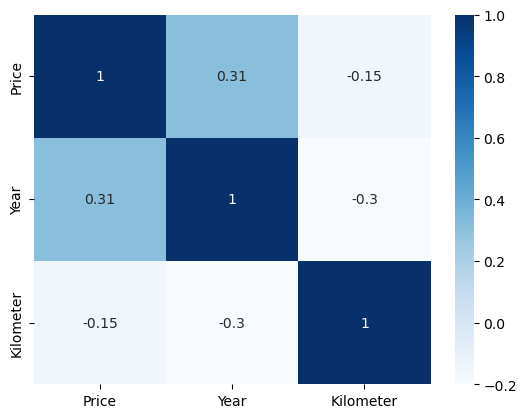

In [20]:
data= data.select_dtypes('number')
sns.heatmap(data.corr(),cmap='Blues',annot=True,vmax=1,vmin=-0.2);

## The selling price of vehicle

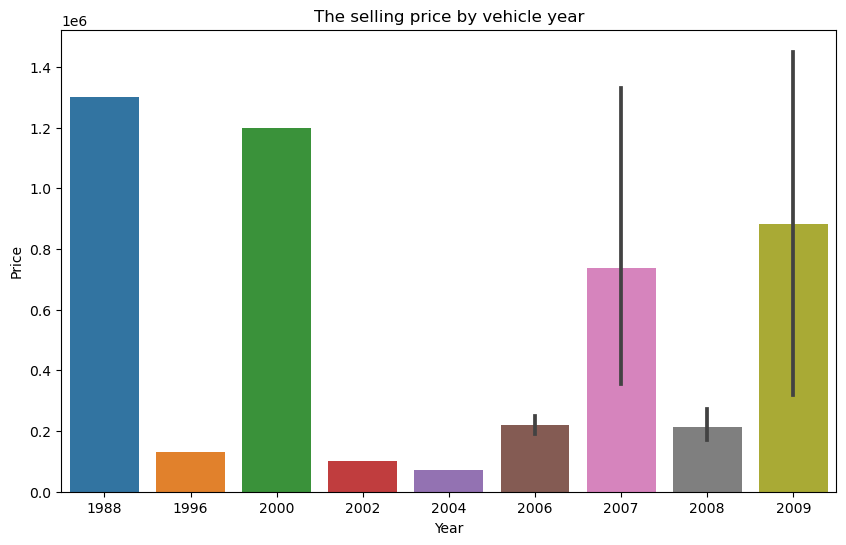

In [21]:
top_sell = data.sort_values(by='Year', ascending=True)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_sell.Price, x=top_sell.Year)
plt.xticks()
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('The selling price by vehicle year')
plt.show()

## Time series selling price vehicles

time series selling price cars


,,Price
Car model,Year,
Land RoverRange Rover 3.0 V6 Diesel Vogue,2019,41300000
Ferrari488 GTB,2018,35000000
Land RoverRange Rover 3.0 V6 Diesel Vogue LWB,2020,27500000
Mercedes-BenzGLS 400d 4MATIC,2021,25900000
LamborghiniHuracan LP 610-4,2016,24000000
BMW5-Series 530d M Sport [2013-2017],2018,21750000
Mercedes-BenzGLC 220d 4MATIC Progressive,2022,21250000
Porsche718 Boxster,2018,20400000
Mercedes-BenzS-Class S 450,2021,20000000


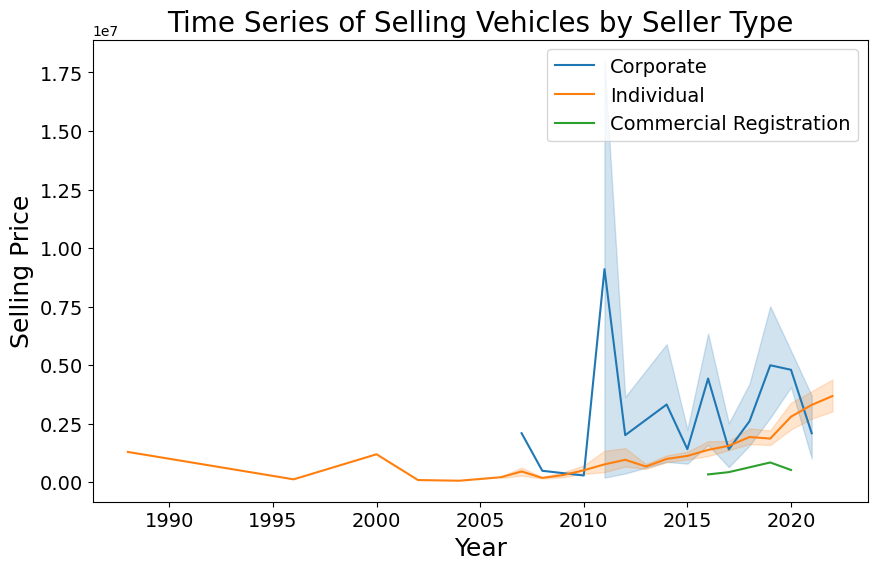

In [30]:
#here we are comparing the selling_price with name (vehicle)
data['Year'] = data["Year"].astype("int")
print('time series selling price cars')
display(data[["Year",'Car model','Price']].groupby(["Car model",
                                                         "Year"]).agg("sum").sort_values(by="Price",
                                                          ascending = False).head(10).style.background_gradient(cmap='Greens'))
# here we are plotting them
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="Year", y='Price', hue="Seller Type")
plt.title("Time Series of Selling Vehicles by Seller Type", fontsize=20)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Selling Price", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

## Recommending Vehicles Based on Fuel

In [55]:
def recommend_vehicle(x):
    y = data[['Price','Year','Kilometer','Transmission','Location','Owner','Seller Type','Car model','Fuel Type']][data["Fuel Type"] == x]
    y = y.sort_values(by="Price",ascending=False)
    return y.head(15)

In [32]:
recommend_vehicle("Diesel")

,Price,Year,Kilometer,Transmission,Location,Owner,Seller Type,Car model,Fuel Type
1305,27500000,2020,11000,Automatic,Hyderabad,Second,Individual,Land RoverRange Rover 3.0 V6 Diesel Vogue LWB,Diesel
582,22000000,2019,35000,Automatic,Pune,First,Individual,Land RoverRange Rover 3.0 V6 Diesel Vogue,Diesel
1313,19300000,2019,63000,Automatic,Bangalore,First,Individual,Land RoverRange Rover 3.0 V6 Diesel Vogue,Diesel
1912,18500000,2021,5000,Automatic,Pune,UnRegistered Car,Individual,Mercedes-BenzS-Class S 350D [2018-2020],Diesel
542,13000000,2021,20000,Automatic,Delhi,First,Individual,Mercedes-BenzGLS 400d 4MATIC,Diesel
1370,12900000,2021,3000,Automatic,Delhi,First,Individual,Mercedes-BenzGLS 400d 4MATIC,Diesel
472,9390000,2022,14000,Automatic,Delhi,First,Individual,Mercedes-BenzGLE 300d 4MATIC LWB,Diesel
750,9200000,2022,10000,Automatic,Delhi,First,Individual,Mercedes-BenzGLE 300d 4MATIC LWB,Diesel
233,9000000,2017,40000,Automatic,Chennai,Second,Individual,MaseratiLevante Diesel,Diesel
1770,8900000,2021,9000,Automatic,Delhi,First,Individual,Mercedes-BenzGLE 300d 4MATIC LWB,Diesel


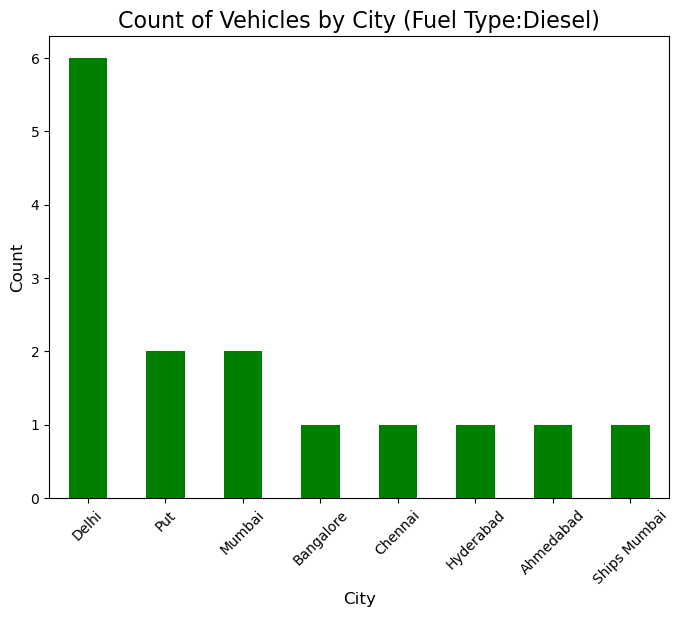

In [33]:
# Create a DataFrame with the provided data
data = {
    'Fuel Type': ['Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel'],
    'Location': ['Bangalore', 'Delhi', 'Chennai', 'Put', 'Delhi', 'Delhi', 'Delhi', 'Put', 'Hyderabad', 'Delhi', 'Mumbai', 'Ahmedabad', 'Mumbai', 'Ships Mumbai', 'Delhi']
}
df = pd.DataFrame(data)
# Plotting the count of diesel vehicles by city
plt.figure(figsize=(8, 6))
df['Location'].value_counts().plot(kind='bar', color='green')
plt.title('Count of Vehicles by City (Fuel Type:Diesel)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [43]:
recommend_vehicle("Petrol")

,Price,Year,Kilometer,Transmission,Location,Owner,Seller Type,Car model,Fuel Type
483,35000000,2018,9500,Automatic,Delhi,First,Individual,Ferrari488 GTB,Petrol
510,24000000,2016,6000,Automatic,Delhi,First,Individual,LamborghiniHuracan LP 610-4,Petrol
1890,20000000,2021,6600,Automatic,Delhi,First,Individual,Mercedes-BenzS-Class S 450,Petrol
1369,20000000,2012,55000,Automatic,Chennai,Third,Individual,Rolls-RoyceGhost Extended Wheelbase,Petrol
1246,20000000,2011,27000,Automatic,Delhi,Third,Individual,Rolls-RoyceGhost Extended Wheelbase,Petrol
442,18500000,2021,21000,Automatic,Gurgaon,First,Individual,Mercedes-BenzS-Class Maybach S 560,Petrol
977,18000000,2011,60000,Automatic,Mumbai,Second,Corporate,Rolls-RoyceGhost 6.5,Petrol
95,16200000,2022,2766,Automatic,Mumbai,First,Individual,PorscheCayenne Coupe Platinum Edition,Petrol
1803,14900000,2021,7534,Automatic,Mumbai,UnRegistered Car,Individual,PorscheCayenne Base,Petrol
1576,13100000,2021,17000,Automatic,Delhi,First,Individual,Mercedes-BenzGLS 450 4MATIC,Petrol


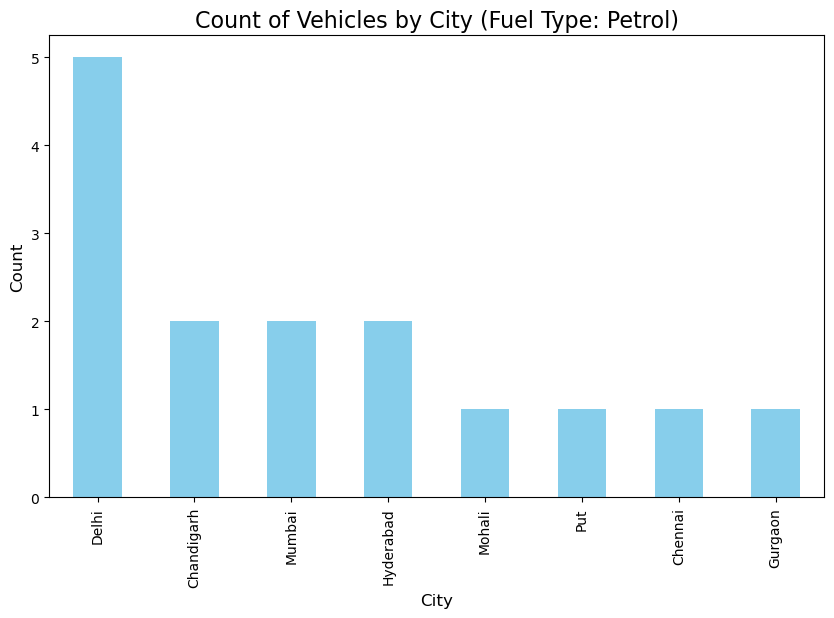

In [44]:
# Create a DataFrame with the provided data
data = {
    'Fuel Type': ['Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Petrol'],
    'Location': ['Delhi', 'Mohali', 'Put', 'Chandigarh', 'Mumbai', 'Mumbai', 'Hyderabad', 'Chandigarh', 'Chennai', 'Delhi', 'Delhi', 'Hyderabad', 'Delhi', 'Gurgaon', 'Delhi']
}

df = pd.DataFrame(data)
# Plotting the count of petrol vehicles by city
plt.figure(figsize=(10, 6))
df['Location'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Vehicles by City (Fuel Type: Petrol)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
recommend_vehicle("CNG")

,Price,Year,Kilometer,Transmission,Location,Owner,Seller Type,Car model,Fuel Type
672,1080000,2021,38000,Manual,Delhi,First,Individual,Maruti SuzukiErtiga VXI CNG,CNG
1951,1025000,2019,42000,Manual,Delhi,First,Individual,Maruti SuzukiErtiga VXI CNG,CNG
783,800000,2017,76642,Manual,Mumbai,First,Individual,Maruti SuzukiErtiga VXI CNG,CNG
1675,740000,2020,39000,Manual,Mumbai,First,Individual,HyundaiAura S 1.2 CNG,CNG
1504,725000,2021,45000,Manual,Ludhiana,First,Individual,HyundaiGrand i10 NIOS Sportz 1.2 Kappa VTVT CNG,CNG
379,695000,2020,18000,Manual,Ghaziabad,First,Individual,HyundaiGrand i10 NIOS Sportz 1.2 Kappa VTVT CNG,CNG
1986,675000,2021,15000,Manual,Pune,First,Individual,Maruti SuzukiWagon R LXi 1.0 CNG,CNG
1111,645000,2021,1374,Manual,Mumbai,First,Individual,Maruti SuzukiEeco 5 STR WITH A/C+HTR CNG [2017...,CNG
820,642000,2014,53693,Manual,Mumbai,First,Individual,Maruti SuzukiErtiga Vxi CNG,CNG
1941,625000,2021,18000,Manual,Delhi,First,Individual,Maruti SuzukiWagon R LXI CNG (O),CNG


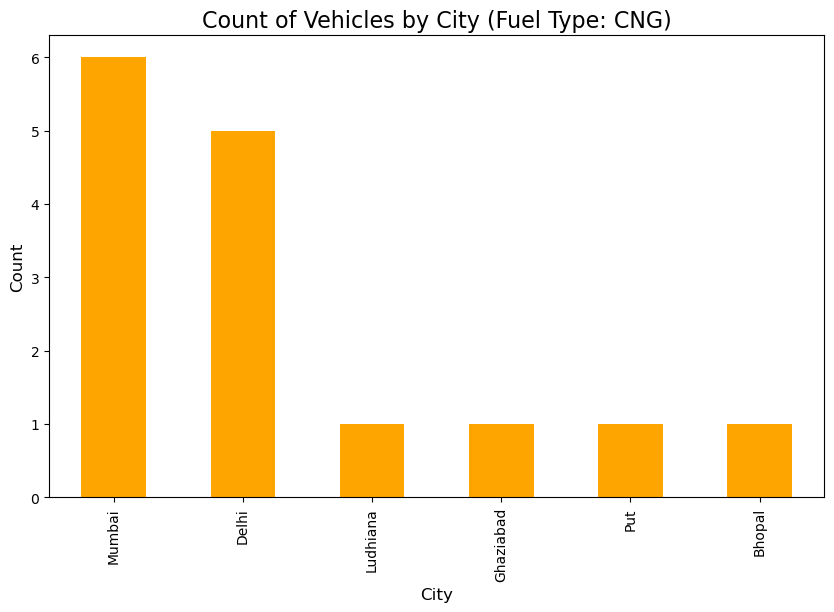

In [57]:
# Create a DataFrame with the provided data
data = {
    'Fuel Type': ['CNG', 'CNG', 'CNG', 'CNG', 'CNG', 'CNG', 'CNG', 'CNG', 'CNG', 'CNG', 'CNG', 'CNG', 'CNG', 'CNG', 'CNG'],
    'Location': ['Delhi', 'Delhi', 'Mumbai', 'Mumbai', 'Ludhiana', 'Ghaziabad', 'Put', 'Mumbai', 'Mumbai', 'Delhi', 'Delhi', 'Bhopal', 'Delhi', 'Mumbai', 'Mumbai']
}

df = pd.DataFrame(data)
# Plotting the count of CNG vehicles by city
plt.figure(figsize=(10, 6))
df['Location'].value_counts().plot(kind='bar', color='orange')
plt.title('Count of Vehicles by City (Fuel Type: CNG)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


In [67]:
recommend_vehicle("Electric")

,Price,Year,Kilometer,Transmission,Location,Owner,Seller Type,Car model,Fuel Type
1906,2100000,2020,38500,Automatic,Delhi,First,Individual,MGZS EV Exclusive [2020-2021],Electric
338,1550000,2020,48400,Automatic,Bangalore,First,Individual,TataNexon EV XZ Plus,Electric
1312,1485000,2020,10000,Automatic,Mumbai,First,Individual,TataNexon EV XZ Plus,Electric
909,1450000,2022,5000,Automatic,Mumbai,First,Individual,TataNexon EV XZ Plus,Electric
127,1375000,2021,16000,Automatic,Mumbai,First,Individual,TataNexon EV XZ Plus,Electric
639,1275000,2021,18000,Automatic,Hyderabad,First,Individual,TataTigor EV XZ Plus,Electric
898,1250000,2021,3000,Automatic,Hyderabad,First,Individual,TataTigor EV XZ Plus,Electric


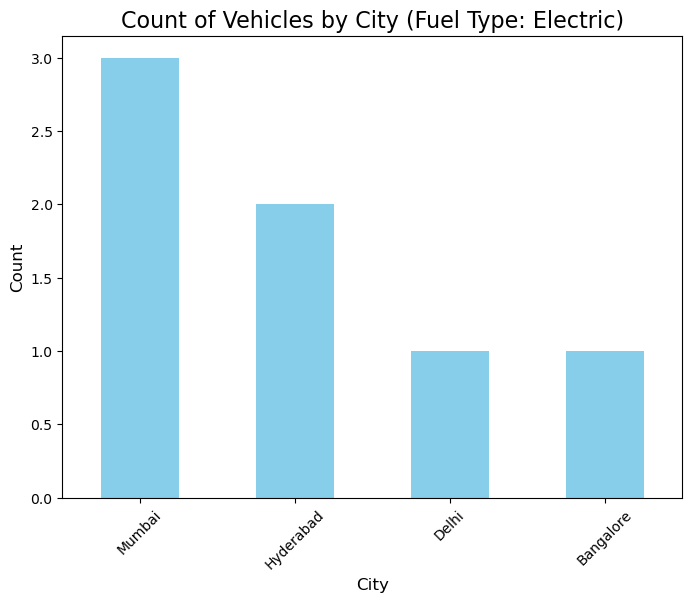

In [68]:
data = {
    'Fuel Type': ['Electric', 'Electric', 'Electric', 'Electric', 'Electric', 'Electric', 'Electric'],
    'Location': ['Delhi', 'Bangalore', 'Mumbai', 'Mumbai', 'Mumbai', 'Hyderabad', 'Hyderabad']
}

df = pd.DataFrame(data)
# Plotting the count of electric vehicles by city
plt.figure(figsize=(8, 6))
df['Location'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Vehicles by City (Fuel Type: Electric)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [69]:
def assign_value(Owner):
    if Owner == 'First':
        return 1
    elif Owner == 'Second':
        return 2
    elif Owner == 'Third':
        return 3
    elif Owner == 'Fourth or more':
        return 4
    else:
        return 5  # Unregistered cars

In [70]:
def assign_value(Seller_Type):
    if Seller_Type == 'Individual':
        return 1
    elif Seller_Type == 'Corporate':
        return 2
    else:
        return 3 

In [80]:
data['Fuel'] = data['Fuel Type'].apply(lambda x: 1 if x == 'Electric' else 0)
data['Trans'] = data['Transmission'].apply(lambda x: 1 if x == 'Manual' else 0)
data['Owner1'] = data['Owner'].apply(assign_value)
data['Seller'] = data['Seller Type'].apply(assign_value)

In [81]:
new_data = data[['Price','Year','Kilometer','Trans','Owner1','Seller','Fuel']]

In [82]:
new_data

,Price,Year,Kilometer,Trans,Owner1,Seller,Fuel
0,505000,2017,87150,1,3,2,0
1,450000,2014,75000,1,3,1,0
2,220000,2011,67000,1,3,1,0
3,799000,2019,37500,1,3,1,0
4,1950000,2018,69000,1,3,1,0
...,...,...,...,...,...,...,...
2054,850000,2016,90300,1,3,1,0
2055,275000,2014,83000,1,3,1,0
2056,240000,2013,73000,1,3,1,0
2057,4290000,2018,60474,0,3,1,0


## Splitting the data into Train and Test data

In [83]:
x = new_data.drop('Fuel',axis=1)
Y = new_data['Fuel']

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train, Y_test = train_test_split(x,Y,random_state=1,test_size=0.2)

In [85]:
x_train

,Price,Year,Kilometer,Trans,Owner1,Seller
563,700000,2019,11000,1,3,1
17,894999,2018,21365,0,3,1
248,319000,2013,47800,1,3,1
1740,740000,2017,88000,1,3,1
1413,900000,2020,23000,1,3,1
...,...,...,...,...,...,...
960,2400000,2014,42533,0,3,1
905,1090000,2017,19000,1,3,1
1096,3250000,2019,41000,0,3,1
235,3500000,2014,160000,0,3,1


In [86]:
Y_test

1178    0
1707    0
920     0
111     0
1011    0
       ..
306     0
1886    0
1873    0
1331    0
560     0
Name: Fuel, Length: 412, dtype: int64

In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,Y_train)

LogisticRegression()

In [88]:
y_pred1=model.predict(x_test)

In [89]:
#Logistic Regression
from sklearn.metrics import accuracy_score
logistic_reg_acc= accuracy_score(Y_test,y_pred1)
print('Log_reg accuracy '+ str(logistic_reg_acc))

Log_reg accuracy 0.9975728155339806


In [90]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model2= DecisionTreeClassifier()
model2.fit(x_train,Y_train)
y_pred2 = model2.predict(x_test)

In [91]:
Decision_tree_acc = accuracy_score(Y_test, y_pred2)
print('Dec_tree_acc  '+str(Decision_tree_acc))

Dec_tree_acc  0.9951456310679612


In [92]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, Y_train)
y_pred3 = model3.predict(x_test)
naive_bayes_acc = accuracy_score(Y_test, y_pred3)
print("Accuracy of naive_bayes is " + str(naive_bayes_acc))

Accuracy of naive_bayes is 0.9975728155339806


In [93]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators = 25, random_state=2)
model4.fit(x_train.values, Y_train.values)
y_pred4 = model4.predict(x_test)
random_fore_acc = accuracy_score(Y_test, y_pred4)
print("Accuracy of Random Forest is " + str(random_fore_acc))

Accuracy of Random Forest is 0.9975728155339806


C:\Users\Shubham\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
